In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import os
import matplotlib.dates as mdates
from netCDF4 import default_fillvals

In [35]:
direc = '/Users/diana/Dropbox/UW/Research/rasm/25_km'
params_filename = 'vic_params_wr50a_vic5.0.dev_20160328.nc'
domain_filename = 'domain.lnd.wr50a_ar9v4.100920.nc'
domain = xr.open_dataset(os.path.join(direc, domain_filename))
params = xr.open_dataset(os.path.join(direc, params_filename))

look at sum of soil depths across RASM domain and make sure that it's uniform 

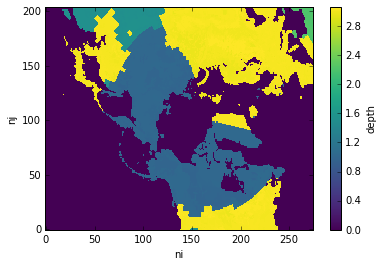

In [36]:
params.depth.sum(dim='nlayer').plot()

In [37]:
params.depth

<xarray.DataArray 'depth' (nlayer: 3, nj: 205, ni: 275)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ..., 
        [      nan,       nan, ...,  0.3     ,  0.3     ],
        [      nan,       nan, ...,  0.3     ,  0.3     ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ..., 
        [      nan,       nan, ...,  1.7     ,  1.7     ],
        [      nan,       nan, ...,  1.7     ,  1.7     ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ..., 
        [      nan,       nan, ...,  0.208768,  0.208768],
        [      nan,       nan, ...,  0.208768,  0.208768]]])
Coordinates:
    yc       (nj, ni) float64 16.53 16.78 17.02 17.27 17.51 17.76 18.0 18.25 ...
    xc       (nj, ni) float64 -170.8 -170.6 -170.4 -170.3 -170.1 -169.9 ...
Dimensions withou

and then look at the depth of each layer to refresh my memory

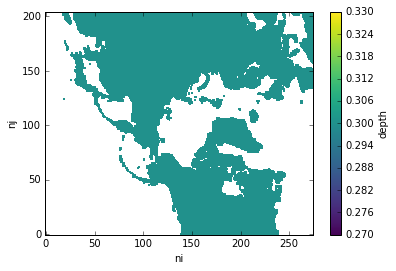

In [38]:
params.depth.isel(nlayer=0).plot()

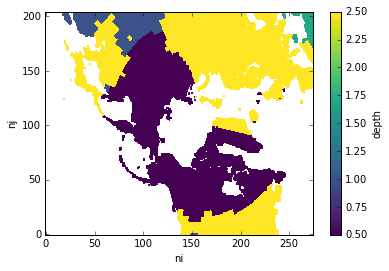

In [39]:
params.depth.isel(nlayer=1).plot()

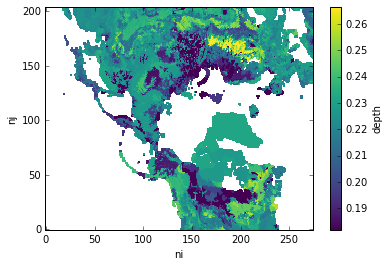

In [40]:
params.depth.isel(nlayer=2).plot()

now for the first perturbation experiment, make first soil layer 3x as deep (from 30cm uniform surface layer depth across domain to 90cm)

In [41]:
# for gridcells with 0.5m depth second layer, make 
params['depth'].values[0, :, :] = params['depth'].values[0, :, :] + (0.33 * params['depth'].values[1, :, :])

check that the surface layer depth actually changed 

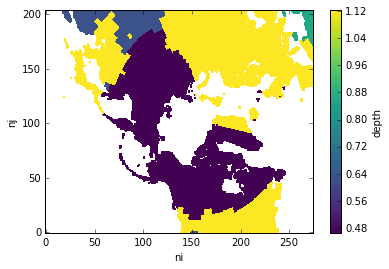

In [42]:
params.depth.isel(nlayer=0).plot()

In [43]:
params.depth.isel(nlayer=0).min()

<xarray.DataArray 'depth' ()>
array(0.46499999999999997)

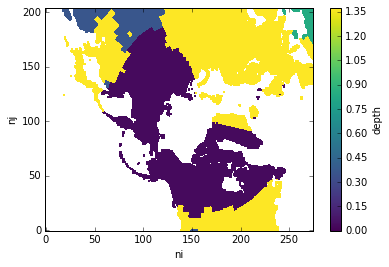

In [45]:
(params.depth.isel(nlayer=1) - params.depth.isel(nlayer=0)).plot(vmin=0)

the encoding we need to do properly so that VIC doesn't complain with the correct integer fillvalues 

In [46]:
fillval_i = default_fillvals['i4']
encoding_params = {'run_cell': {'dtype': 'int32', "_FillValue": fillval_i}, 
                   'gridcell': {'dtype': 'int32', "_FillValue": fillval_i}, 
                   'fs_active': {'dtype': 'int32', "_FillValue": fillval_i}, 
                   'Nveg': {'dtype': 'int32', "_FillValue": fillval_i},
                   'overstory': {'dtype': 'int32', "_FillValue": fillval_i}}

save updated parameters file 

In [47]:
direc_point_runs = '/Users/diana/Dropbox/UW/Research/rasm/agu_2017'
new_params_file = os.path.join(direc_point_runs, 'params.wr50a.surface_soil_layer_3x_deep_20171119.nc')

params.to_netcdf(new_params_file, format='NETCDF4_CLASSIC', encoding=encoding_params)